### 7주차
### 10. 엔트로피


In [14]:
# 연습문제 10.1.1
x = np.linspace(0, 1, 1000)
def ds_entropy(prob):
    h = prob * np.log2(prob)
    return -np.sum(h, axis = 0)

<ipython-input-14-c77ba7855dcd>:4: RuntimeWarning: divide by zero encountered in log2
  h = prob * np.log2(prob)
<ipython-input-14-c77ba7855dcd>:4: RuntimeWarning: invalid value encountered in multiply
  h = prob * np.log2(prob)


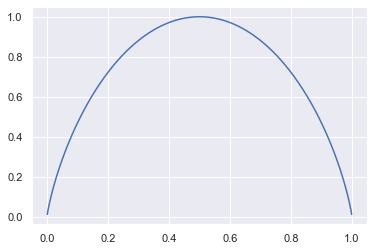

In [15]:
entropy = []
for i in range(1000):
    prob = [x[i], 1 - x[i]]
    entropy.append(ds_entropy(prob))
plt.plot(x, entropy)
plt.show()
    

In [18]:
# 연습문제 10.1.2
eps = np.finfo(float).eps
ds_entropy([1/8, 1/8, 1/4, 1/2])

1.75

In [19]:
ds_entropy([1, eps, eps, eps])

3.4638958368304884e-14

In [20]:
ds_entropy([1/4, 1/4, 1/4, 1/4])

2.0

In [22]:
# 연습문제 10.1.3
import scipy as sp
p = [1/3, 2/3]
sp.stats.entropy(p, base = 2)

0.9182958340544894

In [23]:
p = [3/4, 1/4]
sp.stats.entropy(p, base = 2)

0.8112781244591328

In [24]:
p = [1, 0]
sp.stats.entropy(p, base = 2)

0.0

#### 가변길이 인코딩

In [29]:
N = 200
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate('ABCDEFGH')]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'BAABBGFAABBADCAAABADBAACCAAAAGAACCABACBABABBDDCDFCAAABADACAACAAAADAAAABBBAAABABAABBABADGABABACAABAABAABAABBAABABCBACCHCACBADEBEBCAAAEAAAHAABACBADAACAAABABBDBAAAABABADBBBAAACACBCABAACABAAACABHACFAAAAB'

C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


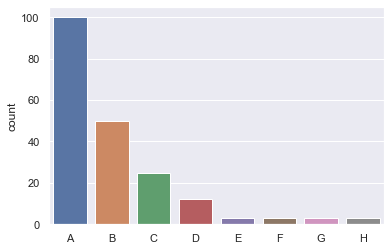

In [31]:
sns.countplot(list(doc), order='ABCDEFGH')
plt.show()

In [33]:
sp.stats.entropy(p, base=2)

2.0

#### 조건부엔트로피를 이용한 붓꽃 분류 문제

In [84]:
from sklearn.datasets import load_iris
iris = load_iris()
# idx = np.in1d(iris.target, [1, 2])
# X = iris.data[idx, :]
# y = iris.target[idx]
X = iris.data

In [85]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3

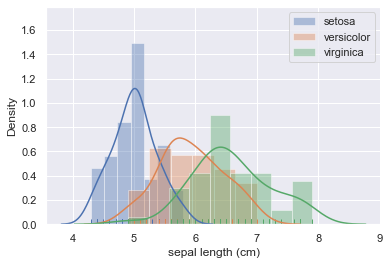

In [86]:
sns.distplot(df[df.species == 0]['sepal length (cm)'], hist = True, rug = True, label = 'setosa')
sns.distplot(df[df.species == 1]['sepal length (cm)'], hist = True, rug = True, label = 'versicolor')
sns.distplot(df[df.species == 2]['sepal length (cm)'], hist = True, rug = True, label = 'virginica')
plt.legend()
plt.show()

In [87]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base = 2)
    HYX1 = sp.stats.entropy(pYX1, base = 2)
    HYX = np.sum(v, axis = 1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

In [96]:
df['X1'] = df['sepal length (cm)'] > 6
df['count'] = 1
pivot_table1 = df.pivot_table(values = 'count', index = 'X1', columns = 'species', aggfunc = sum, fill_value = 0)
pivot_table1

species,0,1,2
X1,,,
False,50,30,9
True,0,20,41


In [69]:
cond_entropy(pivot_table1.values)

0.860714271586387

In [91]:
print(np.min(df['sepal length (cm)']))
print(np.max(df['sepal length (cm)']))

4.3
7.9


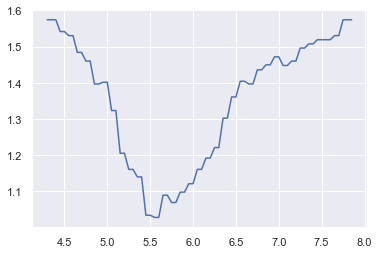

In [97]:
# 연습문제 10.2.1
lenmin = np.min(df['sepal length (cm)'])
lenmax = np.max(df['sepal length (cm)'])
df['count'] = 1
xx = np.arange(start = lenmin, stop = lenmax, step = 0.05)
entropy_value = []
for c in xx:
    df['X1'] = df['sepal length (cm)'] > c
    pivot_table1 = df.pivot_table(values = 'count', index = 'X1', columns = 'species', aggfunc = sum, fill_value = 0)
    entropy_value.append(cond_entropy(pivot_table1.values))

plt.plot(xx, entropy_value)
plt.show()

In [98]:
entropy_value.index(min(entropy_value))

25

In [99]:
xx[25]

5.549999999999995

C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JeongEun Yeon\anaconda3

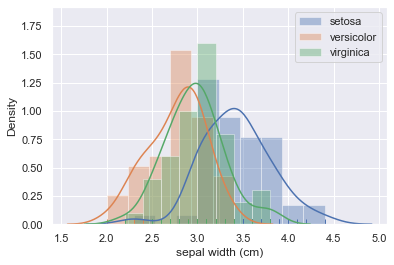

In [100]:
sns.distplot(df[df.species == 0]['sepal width (cm)'], hist = True, rug = True, label = 'setosa')
sns.distplot(df[df.species == 1]['sepal width (cm)'], hist = True, rug = True, label = 'versicolor')
sns.distplot(df[df.species == 2]['sepal width (cm)'], hist = True, rug = True, label = 'virginica')
plt.legend()
plt.show()

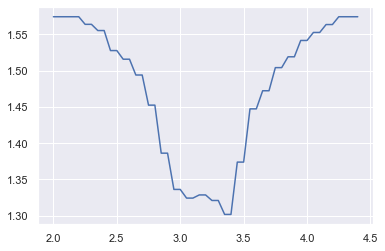

In [101]:
# 연습문제 10.2.1 (3)
lenmin = np.min(df['sepal width (cm)'])
lenmax = np.max(df['sepal width (cm)'])
df['count'] = 1
xx = np.arange(start = lenmin, stop = lenmax, step = 0.05)
entropy_value = []
for c in xx:
    df['X1'] = df['sepal width (cm)'] > c
    pivot_table1 = df.pivot_table(values = 'count', index = 'X1', columns = 'species', aggfunc = sum, fill_value = 0)
    entropy_value.append(cond_entropy(pivot_table1.values))

plt.plot(xx, entropy_value)
plt.show()

In [103]:
# sepal length가 두 붓꽃종을 분류하는 데에 나은 선택이다.
print(entropy_value.index(min(entropy_value)))
print(min(entropy_value))


27
1.3018365115523247


In [137]:
sell_price = 200000
buy_price = 120000
shares = 420
profit = (sell_price - buy_price) * shares * 0.78
invest = buy_price * shares
total = invest + profit
print("profit" , profit)
print("invest", invest)

profit 26208000.0
invest 50400000


In [138]:
total / shares

182400.0

In [141]:
sell_price2 = 65000*2*1.3*1.2
profit2 = (sell_price2 - buy_price) * shares
profit2

34776000.0

In [131]:
65000*2*1.3*1.2

202800.0